In [1]:
import os, sys
sys.path.append(os.path.abspath(os.getcwd()))

In [2]:
from matplotlib import pyplot as plt
import tikzplotlib
import seaborn as sns
from scipy import stats
import numpy as np

from tfload import get_tblogs, extract_data

In [15]:
df_ids = [
    #"DCEnv/RAFSINE/PPO/serverconv2d/211105_095512_env8_ts4M_avgload150/trial_0_2021-11-05_09-55-12", 
    #"DCEnv/RAFSINE/PPO/serverconv2d/211108_124138_crahonly_env8_ts2M_avgload150/trial_0_2021-11-08_12-41-39",
    #"DCEnv/RAFSINE/PPO/baseline/211105_095513_ts500K_avgload150_crah18/trial_0_2021-11-05_09-55-14", 
    #"DCEnv/RAFSINE/PPO/baseline/211105_095515_ts500K_avgload150_crah22/trial_0_2021-11-05_09-55-15",
    "DCEnv/RAFSINE/PPO/baseline/211116_180925_ts500K_avgload150_crah18/trial_0_2021-11-16_18-09-25",
    "DCEnv/RAFSINE/PPO/baseline/211116_180927_ts500K_avgload150_crah22/trial_0_2021-11-16_18-09-27",
    "DCEnv/RAFSINE/PPO/crahonly/211116_180749_env8_ts4M_avgload150/trial_0_2021-11-16_18-07-49",
]
df_names = [
    "B18", 
    "B22", 
    "RL",
]

dfs_all = list(map(get_tblogs, df_ids))

# Fix timescale
rl_id = 2
dfs_all[rl_id] = dfs_all[rl_id].rename({t : int(t/8) for t in dfs_all[rl_id].index.values}, axis=0)
#dfs[2] = dfs[2].rename({t : int(t/8) for t in dfs[2].index.values}, axis=0)

In [16]:
dfs = dfs_all

last_time = min(df.index[-1] for df in dfs)
dfs = list(map(lambda x: x[x.index <= last_time], dfs))

# Plotting
linestyles = ['-.', '--', '-']

In [17]:
# All data
datas = list(map(extract_data, dfs))

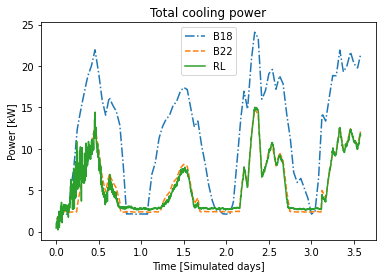

In [18]:
# Cooling power plot
cooling_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["cooling"], linestyle=linestyles[idx])
    
plt.title("Total cooling power")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Power [kW]")
plt.legend(df_names)

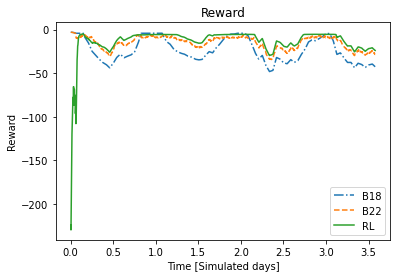

In [19]:
# Reward plot
reward_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["reward"], linestyle=linestyles[idx])
    
plt.title("Reward")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Reward")
plt.legend(df_names)

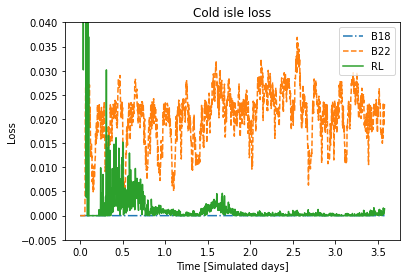

In [20]:
# Cold isle plot
cold_isle_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["cold_isle"], linestyle=linestyles[idx])

plt.ylim(-0.005, 0.04)
plt.title("Cold isle loss")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Loss")
plt.legend(df_names)

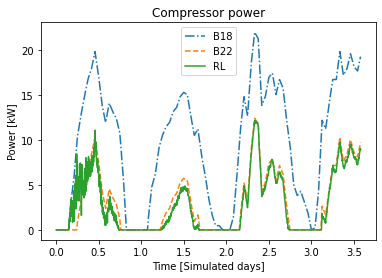

In [21]:
# Compressor plot
compressor_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["compressor"], linestyle=linestyles[idx])

plt.title("Compressor power")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Power [kW]")
plt.legend(df_names)

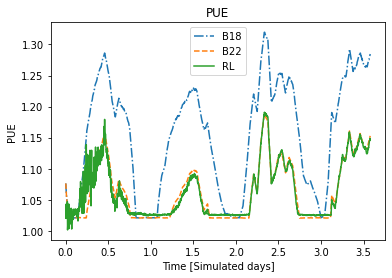

In [22]:
# PUE plot
pue_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["pue"], linestyle=linestyles[idx])

plt.title("PUE")
plt.xlabel("Time [Simulated days]")
plt.ylabel("PUE")
plt.legend(df_names)

(17.0, 28.0)

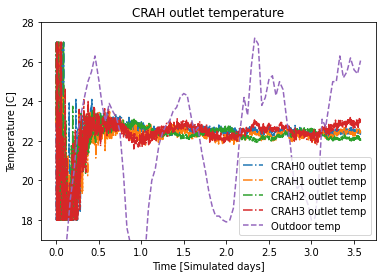

In [27]:
# CRAH temps plot and outdoor for RL
crah_fig = plt.figure(figsize=(6,4))

data = datas[rl_id]
for crah_id in range(4):
    plt.plot(data["time"], data["crah_out_temps"][crah_id], linestyle='-.')
plt.plot(data["time"], data["outdoor_temp"], linestyle='--')

plt.title("CRAH outlet temperature")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Temperature [C]")
plt.legend([f"CRAH{i} outlet temp" for i in range(4)] + ["Outdoor temp"])
plt.ylim(17, 28)

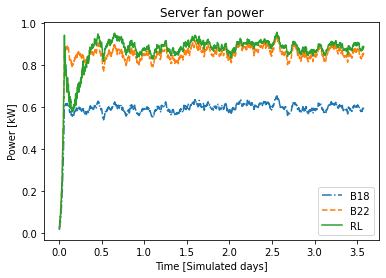

In [24]:
# Total server fan plot
server_fan_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["total_server_fan"], linestyle=linestyles[idx])

plt.title("Server fan power")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Power [kW]")
plt.legend(df_names)

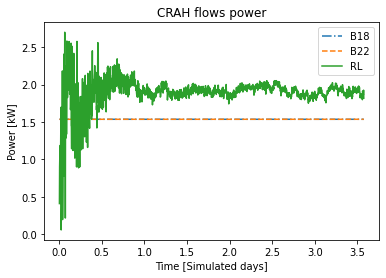

In [25]:
# Total crah fan plot
crah_fan_fig = plt.figure(figsize=(6,4))

for idx in range(len(datas)):
    data = datas[idx]
    plt.plot(data["time"], data["total_crah_fan"], linestyle=linestyles[idx])

plt.title("CRAH flows power")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Power [kW]")
plt.legend(df_names)

Text(0, 0.5, 'Temperature [C]')

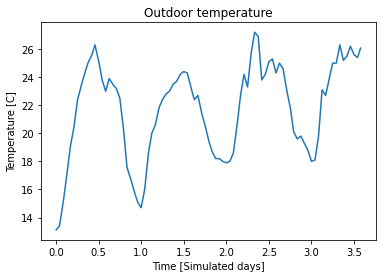

In [31]:
# Outdoor temp plot
outdoor_temp_fig = plt.figure(figsize=(6,4))

data = datas[0] # All use the same outdoor temp
plt.plot(data["time"], data["outdoor_temp"], linestyle=linestyles[idx])

plt.title("Outdoor temperature")
plt.xlabel("Time [Simulated days]")
plt.ylabel("Temperature [C]")

In [32]:
tikzplotlib.save("fig/cooling.tex", cooling_fig)
tikzplotlib.save("fig/reward.tex", reward_fig)
tikzplotlib.save("fig/pue.tex", pue_fig)
tikzplotlib.save("fig/compressor.tex", compressor_fig)
tikzplotlib.save("fig/cold_isle.tex", cold_isle_fig)
tikzplotlib.save("fig/crah.tex", crah_fig)
tikzplotlib.save("fig/server_fan.tex", server_fan_fig)
tikzplotlib.save("fig/crah_fan.tex", crah_fan_fig)
tikzplotlib.save("fig/outdoor_temp.tex", outdoor_temp_fig)

#cooling_fig.savefig("fig/cooling.png")
#reward_fig.savefig("fig/reward.png")
#pue_fig.savefig("fig/pue.png")
#compressor_fig.savefig("fig/compressor.png")
#cold_isle_fig.savefig("fig/cold_isle.png")
#crah_fig.savefig("fig/crah.png")
